# Algorithm 2

### PART 1 -  
#### Execute KMeans. 
Try to find automatticaly the 'elbow' - the best K results ( withour relating to the daily hours or to the number of resources).

### PART 2 - 
#### Order The Clusters.
 * 2a- Index all datapoints (jobs) in a cluster with the same index, when indexing is according to the distance between the clusters.
 * 2b- Execute Shortest Path algorithm at each cluster, connect the cluster by the closest datapoints (jobs). (Index each datapoint with different index)

In [1]:
import sys
import numpy as np # used for scientific computing\n",
import pandas as pd # used for data analysis and manipulation\n",
import matplotlib.pyplot as plt # used for visualization and plotting\n",
import matplotlib.cm as cm
import math
from sklearn.cluster import KMeans 
import heapq

In [2]:
# read the data
df = pd.read_excel('Data/1500 SAs 21 Resources - For IDC.xlsx')

In [3]:
# verify the data
df

,_,AppointmentNumber,DurationInMinutes,Latitude,Longitude,Grid_Number__c,EarliestStartTime,DueDate,SchedStartTime,SchedEndTime
0,[ServiceAppointment],SA-000093262,4,19.477956,-99.180741,37739.12911,2021-07-20T05:12:00.000+0000,2021-08-20T00:00:00.000+0000,2021-07-21T13:18:00.000+0000,2021-07-21T13:22:00.000+0000
1,[ServiceAppointment],SA-000091887,4,19.477956,-99.180741,37739.12911,2021-07-20T05:12:00.000+0000,2021-08-20T00:00:00.000+0000,2021-07-21T13:22:00.000+0000,2021-07-21T13:26:00.000+0000
2,[ServiceAppointment],SA-000093274,4,19.477937,-99.180605,37739.12911,2021-07-20T05:12:00.000+0000,2021-08-20T00:00:00.000+0000,2021-07-21T13:26:00.000+0000,2021-07-21T13:30:00.000+0000
3,[ServiceAppointment],SA-000091881,4,19.477937,-99.180605,37739.12911,2021-07-20T05:12:00.000+0000,2021-08-20T00:00:00.000+0000,2021-07-21T13:30:00.000+0000,2021-07-21T13:34:00.000+0000
4,[ServiceAppointment],SA-000100570,4,19.477937,-99.180605,37739.12911,2021-07-20T05:12:00.000+0000,2021-08-28T00:00:00.000+0000,2021-07-21T13:34:00.000+0000,2021-07-21T13:38:00.000+0000
...,...,...,...,...,...,...,...,...,...,...
1495,[ServiceAppointment],SA-000100513,2,19.480504,-99.180529,37741.12911,2021-07-20T05:12:00.000+0000,2021-08-28T00:00:00.000+0000,2021-07-21T21:37:00.000+0000,2021-07-21T21:39:00.000+0000
1496,[ServiceAppointment],SA-000091560,2,19.480362,-99.180432,37741.12911,2021-07-20T05:12:00.000+0000,2021-08-20T00:00:00.000+0000,2021-07-21T21:40:00.000+0000,2021-07-21T21:42:00.000+0000
1497,[ServiceAppointment],SA-000091581,2,19.480650,-99.180485,37741.12911,2021-07-20T05:12:00.000+0000,2021-08-20T00:00:00.000+0000,2021-07-21T21:43:00.000+0000,2021-07-21T21:45:00.000+0000
1498,[ServiceAppointment],SA-000091572,2,19.480748,-99.180456,37741.12911,2021-07-20T05:12:00.000+0000,2021-08-20T00:00:00.000+0000,2021-07-21T21:46:00.000+0000,2021-07-21T21:48:00.000+0000


In [4]:
def plot(c): 
    plt.scatter(df['Latitude'], df['Longitude'], color=c)

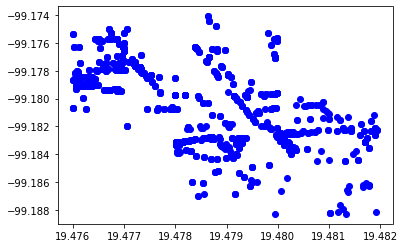

In [5]:
# map of the jobs
plot('blue')

In [6]:
# extract the relvent columns
dataset = np.array(df[['Latitude', 'Longitude']])

In [7]:
# verify the exctraction
dataset

array([[ 19.477956, -99.180741],
       [ 19.477956, -99.180741],
       [ 19.477937, -99.180605],
       ...,
       [ 19.48065 , -99.180485],
       [ 19.480748, -99.180456],
       [ 19.480797, -99.180442]])

# PART 1 - KMEANS

In [8]:
# K to check for the KMeans
Ks = [k for k in range(4, 150)]

In [9]:
# execute KMeans for each K in Ks
inertia_lst = []
for k in Ks:
    kmeans = KMeans(n_clusters=k, random_state=0)
    # fit the data
    _ = kmeans.fit_predict(dataset)
    # save inertia
    inertia_lst.append(kmeans.inertia_)

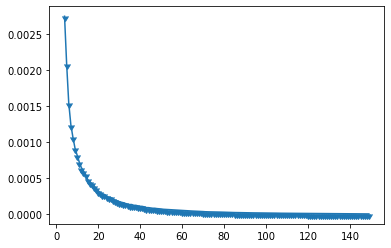

In [10]:
# plot inertia as function of number of clusers (k)
plt.plot(Ks, inertia_lst, marker=11)

finding the elbow is the method to find the best K. 
The solution is not optimal which means it is not return the best result any time.
In contrast, the result will be always close to the truth and the small error may not affect on our results drastically.

In [11]:
# finding the elbow
length = len(inertia_lst) - 1

# delta_1: index=0 -> #cluster=2 -> best_k_idx=1
delta_1 = [inertia_lst[i] - inertia_lst[i+1] for i in range(length)]

# delta_2: index 0 -> #cluster=3 -> best_k_idx=2
delta_2 = [delta_1[i] - delta_1[i+1] for i in range(length - 1)]

strength = [(i, delta_2[i+1] - delta_1[i+2]) for i in range(length - 2) if delta_1[i+1] >= 0 and delta_2[i+1] >= 0]

best_k_idx = max(strength,key=lambda t: t[1])[0] + 2
best_k = Ks[best_k_idx]

In [12]:
# get the best KMeans 
best_kmeans = KMeans(n_clusters=best_k, random_state=0)

In [13]:
# seperate the instances to clusters

# get labels 
labels = best_kmeans.fit_predict(dataset)

# init dictionary
dict_of_clusters = {cluster: [] for cluster in range(best_k)}

for idx, instance in enumerate(dataset):
    dict_of_clusters[labels[idx]].append(instance)

In [14]:
# print cluster sizes
for cluster, instances in dict_of_clusters.items():
    print(f'------Cluster {cluster}: {len(instances)} jobs --------')
    print()

------Cluster 0: 185 jobs --------

------Cluster 1: 60 jobs --------

------Cluster 2: 26 jobs --------

------Cluster 3: 21 jobs --------

------Cluster 4: 45 jobs --------

------Cluster 5: 20 jobs --------

------Cluster 6: 126 jobs --------

------Cluster 7: 45 jobs --------

------Cluster 8: 33 jobs --------

------Cluster 9: 10 jobs --------

------Cluster 10: 81 jobs --------

------Cluster 11: 30 jobs --------

------Cluster 12: 37 jobs --------

------Cluster 13: 39 jobs --------

------Cluster 14: 12 jobs --------

------Cluster 15: 32 jobs --------

------Cluster 16: 27 jobs --------

------Cluster 17: 19 jobs --------

------Cluster 18: 10 jobs --------

------Cluster 19: 90 jobs --------

------Cluster 20: 79 jobs --------

------Cluster 21: 72 jobs --------

------Cluster 22: 9 jobs --------

------Cluster 23: 72 jobs --------

------Cluster 24: 11 jobs --------

------Cluster 25: 15 jobs --------

------Cluster 26: 28 jobs --------

------Cluster 27: 8 jobs --------

--

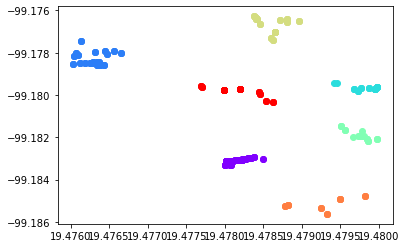

In [15]:
# plot the results
clusters = [c for c in range(best_k)]
colors = cm.rainbow(np.linspace(0, 1, Ks[3]))
for cluster, c in zip(clusters, colors):
    data = np.array(dict_of_clusters[cluster])
    plt.scatter(data[:, 0], data[:, 1], color=c)

# PART 2 - Order The Clusters 

In [16]:
# centers (centroids) of clusters
centers = best_kmeans.cluster_centers_

In [17]:
# radius of the Earth
R = 6373.0

def compute_distance(place_1, place_2):
    """
    compute the distance between two lat-long coordinates

    Input:

    place_1 - tuple : (latitude, longitude) of place 1
    place_2 - tuple : (latitude, longitude) of place 2

    Returns:
    distance - float number 
    """    
    
    distance_lat = place_2[0] - place_1[0]
    distance_long = place_2[1] - place_1[1]

    #Haverinse formula 
    x = math.sin(distance_lat / 2)**2 + math.cos(place_1[0]) * math.cos(place_2[0]) * math.sin(distance_long / 2)**2

    y = 2 * math.atan2(math.sqrt(x), math.sqrt(1 - x))

    return R * y

### 2a -
- Order the cluster according to the distances between them. 
- All data points in the same cluster will get the same index.

In [18]:
# order the clusters according to distance from cluster 0 

d_array = [(0,0)]
c_0 = centers[0]
for idx, c in enumerate(centers[1:]):
    d_array += [(compute_distance(c_0, c), idx + 1)]
cluster_distance = sorted(d_array, key=lambda x: x[0]) 

dict_cluster_to_idx = {c[1] : idx for idx, c in enumerate(cluster_distance)}

idx_res_column = []

# for each row add the relevent number according to the order of the clusters
for label in labels:
    idx_res_column += [dict_cluster_to_idx[label]]    

In [19]:
# add the column to the dataFrame
df['Index'] = idx_res_column

In [20]:
# craete result new excel
df.to_excel('results(2a).xlsx', sheet_name='results')

### 2b - 
Order the cluters by executing shortest path algorithm on each cluster. 

In [21]:
# seprate the datapoints according to their cluster
# save id = job's row.
separate_dataset = [[] for cluster in range(best_k)]
id = 0
for datapoint, label in zip(dataset, labels):
    separate_dataset[label].append((id, datapoint))
    id += 1

Shoretest path Algorithm: 
### Dijkstra algorithm

- We execute SP on every cluster according to the order we achieved above.
- Fisrt iteration: 
    - Startpoint: take random datapoint
    - Endpoint: random datapoint from the next cluster
- Next iterations:
    - StartPoint: the endpoint from the previous iteration
    - Endpoint: random datapoint from the next cluster

In [22]:
# save the oredr of the clusters
cluster_order = [c[1] for c in cluster_distance]

In [23]:
MAX_VALUE = sys.float_info.max

In [24]:
class Vertex: 
    
    def __init__(self, job, is_root=False):
        self.id = job[0]
        self.place = job[1]
        self.distance = 0 if (is_root) else MAX_VALUE
        self.parent = None


    def relax(self, v):
        distance_from_self_to_v = compute_distance(self.place, v.place) 
        if v.distance > self.distance + distance_from_self_to_v:
            v.distance = self.distance + distance_from_self_to_v
            v.parent = self.id
            
    # implemt =, < for using heapq on vertex
    def __eq__(self, other):
        if self.distance == other.distance:
            return True
        else:
            return False

    def __lt__(self, other):
        if self.distance < other.distance:
            return True
        else:
            return False

In [25]:
idx = 0
results = []
for cluster in range(best_k):
    root = Vertex(separate_dataset[cluster][0], is_root=True)
    G = [Vertex(datapoint) for datapoint in separate_dataset[cluster][1:]]
    G.append(root)
    # we do not use E since there are edges between all the vertices
    #E = [(v1.id, v2.id) for v1 in G for v2 in G]

    # ------- Execute DIJKSTRA -------- #
    priority_queue = []
    #push all vertices
    for v in G:
        heapq.heappush(priority_queue, v)
    while priority_queue != []:
        # dequeue the smallest vertex (according to the distance field)
        u = heapq.heappop(priority_queue)
        results.append((u.id, idx)) #u.index = idx  ->. at Dijkstra the first to leave th queue is the closet to the begining
        for v in G:
            u.relax(v)
        idx +=1

In [26]:
#sort result according to rows order ('id')
results.sort(key=lambda row: row[0])
results = [row[1] for row in results]

In [27]:
# add the column to the dataFrame
df['Index'] = results

In [28]:
# craete result new excel
df.to_excel('results(2b).xlsx', sheet_name='results')